In [ ]:
# Užduotys

In [ ]:
'''
1) Duomenų surinkimas (nepadaryta)
2) Duomenų paruošimas (nepadaryta)
3) Požymių išskyrimas (nepadaryta)
4) Modelio apmokymas (nepadaryta)
5) Modelio testavimas (nepadaryta)
'''

In [ ]:
# Žingsniai

In [ ]:
'''
1) įkelti duomenų rinkinį ir patikrinti ar nėra tuščių reikšmių (įkeltas 1-as rinkinys)
2) padalyti duomenų rinkinį į mokymo ir testavimo rinkinius (nepadaryta)
3) išskirti skaitinius požymius (nepadaryta)
4) sukurti modelį (nepadaryta)
5) įvertinti modelio tikslumą (nepadaryta)
'''

In [ ]:
# Duomenų rinkiniai

In [ ]:
# ----- Dataset 1 ("dataset-spam.csv") -----
dataset_1 = "./dataset-spam.csv"
dataset_1_header = 'v1'

# Duomenys:
# Viso: 5572
# Ham: 4825
# Spam: 747
# Reikalingas modelio efektyvumas: > 86.6%
# Komentaras: žiūrime į "v1" ir "v2" header'ius. Kitus ignoruojame.

# ----- Dataset 2 (gal bus?) -----

In [ ]:
# Duomenų rinkinio įkėlimas

In [22]:
import pandas as pd

current_dataset = dataset_1
current_header = dataset_1_header

df = pd.read_csv(current_dataset, encoding="latin1")

# Žiūrime bendrą duomenų rinkinio statistiką
print("Bendra statistika", current_header, ":")
print(df[current_header].value_counts())

# Tikriname tuščias reikšmes (kad vėliau apdorotume rinkinį jeigu prireiks)
print("\nTuščios reikšmės:")
print(df.isnull().sum())

Bendra statistika v1 :
v1
ham     4825
spam     747
Name: count, dtype: int64

Tuščios reikšmės:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
# Tuščių reikšmių pašalinimas (atkomentuoti kai prireiks)
# df.dropna(inplace=True)

In [ ]:
# Statistinė duomenų analizė

In [26]:
# 1-am duomenų rinkiniui
df['length'] = df['v2'].astype(str).apply(len)
print(df['length'].describe())

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64


In [ ]:
# Duomenų vizualizavimas

<Axes: ylabel='Frequency'>

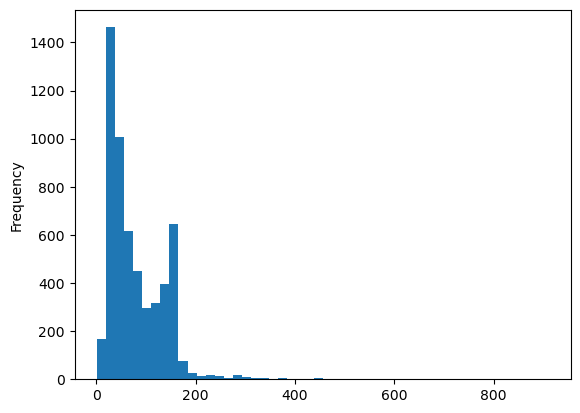

In [27]:
# 1-am duomenų rinkiniui (x-simbolių skaičius ; y-dažnumas)
import matplotlib.pyplot as plt
df['length'].plot(bins=50, kind="hist")